In [1]:
from pyspark.sql import functions as F, SparkSession
from pyspark.sql.functions import col, lit, sum
from pyspark.sql import functions as f
from matplotlib import pyplot as plt
from datetime import timedelta
from pyspark.sql.types import *
import pandas as pd

spark = SparkSession.builder.appName('spark_session').getOrCreate()

22/03/21 01:07:09 WARN Utils: Your hostname, HonorMagicBook resolves to a loopback address: 127.0.1.1; using 192.168.0.38 instead (on interface wlp2s0)
22/03/21 01:07:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/21 01:07:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/03/21 01:07:12 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/03/21 01:07:12 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


## Создание датафреймов 

In [2]:
df = [['A1', 'B1', 2, '21-12-2021 10:30'], 
      ['A2', 'B2', 4, '21-12-2021 10:40'], 
      ['A3', 'B3', 5, '21-12-2021 11:00']]
df_pandas = pd.DataFrame(df, columns = ['A', 'B', 'Value', 'Date_Column'])

df_pandas

,A,B,Value,Date_Column
0,A1,B1,2,21-12-2021 10:30
1,A2,B2,4,21-12-2021 10:40
2,A3,B3,5,21-12-2021 11:00


In [3]:
df_spark = spark.createDataFrame(
    [('A1', 'B1', 2, '21-12-2021 10:30'), 
     ('A2', 'B2', 4, '21-12-2021 10:40'), 
     ('A3', 'B3', 5, '21-12-2021 11:00')],
    ['A', 'B', 'Value', 'Date_Column'] 
)

df_spark.show()

+---+---+-----+----------------+
|  A|  B|Value|     Date_Column|
+---+---+-----+----------------+
| A1| B1|    2|21-12-2021 10:30|
| A2| B2|    4|21-12-2021 10:40|
| A3| B3|    5|21-12-2021 11:00|
+---+---+-----+----------------+



## Создание новых столбцов

Новый столбец с постоянными значениями

In [4]:
df_pandas['C'] = 'New Constant'
df_spark = df_spark.withColumn('C', F.lit('New Constant'))

df_pandas

,A,B,Value,Date_Column,C
0,A1,B1,2,21-12-2021 10:30,New Constant
1,A2,B2,4,21-12-2021 10:40,New Constant
2,A3,B3,5,21-12-2021 11:00,New Constant


In [5]:
df_spark.show()

+---+---+-----+----------------+------------+
|  A|  B|Value|     Date_Column|           C|
+---+---+-----+----------------+------------+
| A1| B1|    2|21-12-2021 10:30|New Constant|
| A2| B2|    4|21-12-2021 10:40|New Constant|
| A3| B3|    5|21-12-2021 11:00|New Constant|
+---+---+-----+----------------+------------+



Новый столбец с использованием существующих столбцов

In [6]:
df_pandas['C'] = df_pandas['A'] + df_pandas['B']
df_spark = df_spark.withColumn('C', F.concat('A', 'B'))

df_pandas

,A,B,Value,Date_Column,C
0,A1,B1,2,21-12-2021 10:30,A1B1
1,A2,B2,4,21-12-2021 10:40,A2B2
2,A3,B3,5,21-12-2021 11:00,A3B3


In [7]:
df_spark.show()

+---+---+-----+----------------+----+
|  A|  B|Value|     Date_Column|   C|
+---+---+-----+----------------+----+
| A1| B1|    2|21-12-2021 10:30|A1B1|
| A2| B2|    4|21-12-2021 10:40|A2B2|
| A3| B3|    5|21-12-2021 11:00|A3B3|
+---+---+-----+----------------+----+



## Обновление данных существующего столбца

In [8]:
df_pandas['Value'] = df_pandas['Value']**2
df_spark = df_spark.withColumn('Value', F.col('Value')**2)

df_pandas

,A,B,Value,Date_Column,C
0,A1,B1,4,21-12-2021 10:30,A1B1
1,A2,B2,16,21-12-2021 10:40,A2B2
2,A3,B3,25,21-12-2021 11:00,A3B3


In [9]:
df_spark.show()

+---+---+-----+----------------+----+
|  A|  B|Value|     Date_Column|   C|
+---+---+-----+----------------+----+
| A1| B1|  4.0|21-12-2021 10:30|A1B1|
| A2| B2| 16.0|21-12-2021 10:40|A2B2|
| A3| B3| 25.0|21-12-2021 11:00|A3B3|
+---+---+-----+----------------+----+



## Выборка, фильтрация данных

In [10]:
df_pandas[['A','B']]

,A,B
0,A1,B1
1,A2,B2
2,A3,B3


In [11]:
df_spark.select('A','B').show()

+---+---+
|  A|  B|
+---+---+
| A1| B1|
| A2| B2|
| A3| B3|
+---+---+



In [12]:
df_pandas[df_pandas['Value']<600]

,A,B,Value,Date_Column,C
0,A1,B1,4,21-12-2021 10:30,A1B1
1,A2,B2,16,21-12-2021 10:40,A2B2
2,A3,B3,25,21-12-2021 11:00,A3B3


In [13]:
df_spark.filter(df_spark.Value < 600).show()

+---+---+-----+----------------+----+
|  A|  B|Value|     Date_Column|   C|
+---+---+-----+----------------+----+
| A1| B1|  4.0|21-12-2021 10:30|A1B1|
| A2| B2| 16.0|21-12-2021 10:40|A2B2|
| A3| B3| 25.0|21-12-2021 11:00|A3B3|
+---+---+-----+----------------+----+



## Преобразования типа столбца

In [14]:
df_pandas['Date_Column'] = pd.to_datetime(df_pandas['Date_Column'], format='%d-%m-%Y %H:%M')

df_pandas.dtypes

A                      object
B                      object
Value                   int64
Date_Column    datetime64[ns]
C                      object
dtype: object

In [15]:
df_spark.withColumn("Date_Column", F.to_timestamp("Date_Column", "dd-MM-yyyy hh:mm"))

df_spark.show()

+---+---+-----+----------------+----+
|  A|  B|Value|     Date_Column|   C|
+---+---+-----+----------------+----+
| A1| B1|  4.0|21-12-2021 10:30|A1B1|
| A2| B2| 16.0|21-12-2021 10:40|A2B2|
| A3| B3| 25.0|21-12-2021 11:00|A3B3|
+---+---+-----+----------------+----+



## Переименование, удаление столбцов

In [16]:
df_pandas = df_pandas.rename(columns={'A': 'Col_A', 'B': 'Col_B'})

df_pandas

,Col_A,Col_B,Value,Date_Column,C
0,A1,B1,4,2021-12-21 10:30:00,A1B1
1,A2,B2,16,2021-12-21 10:40:00,A2B2
2,A3,B3,25,2021-12-21 11:00:00,A3B3


In [17]:
df_spark.withColumnRenamed('A', 'Col_A').withColumnRenamed('B', 'Col_B')

df_spark.show()

+---+---+-----+----------------+----+
|  A|  B|Value|     Date_Column|   C|
+---+---+-----+----------------+----+
| A1| B1|  4.0|21-12-2021 10:30|A1B1|
| A2| B2| 16.0|21-12-2021 10:40|A2B2|
| A3| B3| 25.0|21-12-2021 11:00|A3B3|
+---+---+-----+----------------+----+



In [18]:
df_spark = df_spark.drop('A', 'B')

df_spark.show()

+-----+----------------+----+
|Value|     Date_Column|   C|
+-----+----------------+----+
|  4.0|21-12-2021 10:30|A1B1|
| 16.0|21-12-2021 10:40|A2B2|
| 25.0|21-12-2021 11:00|A3B3|
+-----+----------------+----+



In [19]:
df_pandas.drop(['Col_A', 'Col_B'], axis=1)

,Value,Date_Column,C
0,4,2021-12-21 10:30:00,A1B1
1,16,2021-12-21 10:40:00,A2B2
2,25,2021-12-21 11:00:00,A3B3


## Остальное

In [20]:
print(df_pandas.shape)

print((df_spark.count(), len(df_spark.columns)))

(3, 5)
(3, 3)


In [21]:
df_pandas['Value'].unique()

array([ 4, 16, 25])

In [22]:
df_spark.select('Value').distinct().show()

+-----+
|Value|
+-----+
|  4.0|
| 16.0|
| 25.0|
+-----+



## Spark

SparkSession — это способ инициализации базовой функциональности PySpark для программного создания PySpark RDD, DataFrame и Dataset. 

SparkSession внутренне создает SparkConfig и SparkContext с конфигурацией, предоставленной с SparkSession. SparkSession можно создать с помощью SparkSession.builder, который представляет собой реализацию шаблона проектирования Builder.

Чтобы создать SparkSession необходимо использовать метод builder().
</br>
getOrCreate() возвращает уже существующий SparkSession; если он не существует, создается новый SparkSession.
</br>
appName() используется для установки имени приложения.
</br>
master(): если работа идёт с кластером, тогда нужно передать имя кластерного менеджера в качестве аргумента.


Обычно это либо yarn, либо mesos в зависимости от настройки кластера, а при работе в автономном режиме используется local[x]. Здесь X указывает сколько разделов будет создано при использовании RDD, DataFrame и Dataset.

In [23]:
spark = SparkSession.builder.master("local[*]").appName('PySpark_Tutorial').getOrCreate()

Схема Spark отображает структуру фрейма данных или датасета. Можно определить её с помощью класса StructType, который представляет собой коллекцию объектов StructField. Они в свою очередь устанавливают имя столбца, его тип, допускает ли он значение NULL, и метаданные.

In [24]:
data_schema = [
               StructField('gender', StringType(), True),
               StructField('race/ethnicity', StringType(), True),
               StructField('parental level of education', StringType(), True),
               StructField('lunch', StringType(), True),
               StructField('test preparation course', StringType(), True),
               StructField('math score', IntegerType(), True),
               StructField('reading score', IntegerType(), True),
               StructField('writing score', IntegerType(), True),
            ]

final_struc = StructType(fields = data_schema)

## Чтение данных

In [25]:
Students = spark.read.csv('/home/oem/Desktop/StudentsPerformance.csv', header=True, sep=',', schema=final_struc)

In [26]:
Students = Students.withColumnRenamed('parental level of education', 'education')
Students = Students.withColumnRenamed('test preparation course', 'test')

Students.show()

+------+--------------+------------------+------------+---------+----------+-------------+-------------+
|gender|race/ethnicity|         education|       lunch|     test|math score|reading score|writing score|
+------+--------------+------------------+------------+---------+----------+-------------+-------------+
|female|       group B| bachelor's degree|    standard|     none|        72|           72|           74|
|female|       group C|      some college|    standard|completed|        69|           90|           88|
|female|       group B|   master's degree|    standard|     none|        90|           95|           93|
|  male|       group A|associate's degree|free/reduced|     none|        47|           57|           44|
|  male|       group C|      some college|    standard|     none|        76|           78|           75|
|female|       group B|associate's degree|    standard|     none|        71|           83|           78|
|female|       group B|      some college|    standard|

In [27]:
Students.printSchema()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading score: integer (nullable = true)
 |-- writing score: integer (nullable = true)



## Spark

## Различные методы инспекции данных

In [28]:
# schema возвращает схему данных
Students.schema

StructType(List(StructField(gender,StringType,true),StructField(race/ethnicity,StringType,true),StructField(education,StringType,true),StructField(lunch,StringType,true),StructField(test,StringType,true),StructField(math score,IntegerType,true),StructField(reading score,IntegerType,true),StructField(writing score,IntegerType,true)))

In [29]:
# printSchema() отображает схему данных
Students.printSchema() 

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading score: integer (nullable = true)
 |-- writing score: integer (nullable = true)



In [30]:
# dtypes возвращает список кортежей с именами столбцов и типами данных
Students.dtypes

[('gender', 'string'),
 ('race/ethnicity', 'string'),
 ('education', 'string'),
 ('lunch', 'string'),
 ('test', 'string'),
 ('math score', 'int'),
 ('reading score', 'int'),
 ('writing score', 'int')]

In [31]:
# head(n) возвращает n строк в виде списка
Students.head(3)

[Row(gender='female', race/ethnicity='group B', education="bachelor's degree", lunch='standard', test='none', math score=72, reading score=72, writing score=74),
 Row(gender='female', race/ethnicity='group C', education='some college', lunch='standard', test='completed', math score=69, reading score=90, writing score=88),
 Row(gender='female', race/ethnicity='group B', education="master's degree", lunch='standard', test='none', math score=90, reading score=95, writing score=93)]

In [32]:
# show() по умолчанию отображает первые 20 строк
Students.show(6)

+------+--------------+------------------+------------+---------+----------+-------------+-------------+
|gender|race/ethnicity|         education|       lunch|     test|math score|reading score|writing score|
+------+--------------+------------------+------------+---------+----------+-------------+-------------+
|female|       group B| bachelor's degree|    standard|     none|        72|           72|           74|
|female|       group C|      some college|    standard|completed|        69|           90|           88|
|female|       group B|   master's degree|    standard|     none|        90|           95|           93|
|  male|       group A|associate's degree|free/reduced|     none|        47|           57|           44|
|  male|       group C|      some college|    standard|     none|        76|           78|           75|
|female|       group B|associate's degree|    standard|     none|        71|           83|           78|
+------+--------------+------------------+------------+

In [33]:
# first() возвращает первую строку данных
Students.first()

Row(gender='female', race/ethnicity='group B', education="bachelor's degree", lunch='standard', test='none', math score=72, reading score=72, writing score=74)

In [34]:
# take(n) возвращает первые n строк
Students.take(3)

[Row(gender='female', race/ethnicity='group B', education="bachelor's degree", lunch='standard', test='none', math score=72, reading score=72, writing score=74),
 Row(gender='female', race/ethnicity='group C', education='some college', lunch='standard', test='completed', math score=69, reading score=90, writing score=88),
 Row(gender='female', race/ethnicity='group B', education="master's degree", lunch='standard', test='none', math score=90, reading score=95, writing score=93)]

In [35]:
# describe() вычисляет некоторые статистические значения для столбцов с числовым типом данных
Students.describe().show()

+-------+------+--------------+------------------+------------+---------+------------------+------------------+-----------------+
|summary|gender|race/ethnicity|         education|       lunch|     test|        math score|     reading score|    writing score|
+-------+------+--------------+------------------+------------+---------+------------------+------------------+-----------------+
|  count|  1000|          1000|              1000|        1000|     1000|              1000|              1000|             1000|
|   mean|  null|          null|              null|        null|     null|            66.089|            69.169|           68.054|
| stddev|  null|          null|              null|        null|     null|15.163080096009454|14.600191937252223|15.19565701086966|
|    min|female|       group A|associate's degree|free/reduced|completed|                 0|                17|               10|
|    max|  male|       group E|  some high school|    standard|     none|               10

In [36]:
# count() возвращает общее число строк в датасете
Students.count() 

1000

In [37]:
# describe() вычисляет некоторые статистические значения для столбцов с числовым типом данных
Students.describe(['math score','reading score', 'writing score']).show()

+-------+------------------+------------------+-----------------+
|summary|        math score|     reading score|    writing score|
+-------+------------------+------------------+-----------------+
|  count|              1000|              1000|             1000|
|   mean|            66.089|            69.169|           68.054|
| stddev|15.163080096009454|14.600191937252223|15.19565701086966|
|    min|                 0|                17|               10|
|    max|               100|               100|              100|
+-------+------------------+------------------+-----------------+



In [38]:
# columns возвращает список, содержащий названия столбцов
Students.columns

['gender',
 'race/ethnicity',
 'education',
 'lunch',
 'test',
 'math score',
 'reading score',
 'writing score']

## Манипуляции со столбцами

1. Добавление столбца: withColumn добавляет новый столбец к существующим. Метод принимает два параметра: имя столбца и данные. 
2. Обновление столбца: withColumnRenamed переименовывает существующий столбец. Метод принимает два параметра: название существующего столбца и его новое имя.
3. Удаление столбца: drop принимает имя столбца и возвращает данные.

In [39]:
Students = Students.withColumn('score', Students['math score']
                                + Students['reading score'] 
                                + Students['writing score'])

Students.show(5)

+------+--------------+------------------+------------+---------+----------+-------------+-------------+-----+
|gender|race/ethnicity|         education|       lunch|     test|math score|reading score|writing score|score|
+------+--------------+------------------+------------+---------+----------+-------------+-------------+-----+
|female|       group B| bachelor's degree|    standard|     none|        72|           72|           74|  218|
|female|       group C|      some college|    standard|completed|        69|           90|           88|  247|
|female|       group B|   master's degree|    standard|     none|        90|           95|           93|  278|
|  male|       group A|associate's degree|free/reduced|     none|        47|           57|           44|  148|
|  male|       group C|      some college|    standard|     none|        76|           78|           75|  229|
+------+--------------+------------------+------------+---------+----------+-------------+-------------+-----+
o

In [40]:
Students = Students.replace({'none':None}, subset = ['test'])

In [41]:
Students.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in Students.columns)).show()

+------+--------------+---------+-----+----+----------+-------------+-------------+-----+
|gender|race/ethnicity|education|lunch|test|math score|reading score|writing score|score|
+------+--------------+---------+-----+----+----------+-------------+-------------+-----+
|     0|             0|        0|    0| 642|         0|            0|            0|    0|
+------+--------------+---------+-----+----+----------+-------------+-------------+-----+



## Работа с недостающими значениями

In [42]:
# Удаление строк с пропущенными значениями
Students.na.drop()

# Замена отсутствующих значений средним Students.na.fill(Students.select(f.mean(Students['open'])).collect()[0][0])
# Замена отсутствующих значений новыми Students.na.replace(old_value, new_vallue)

DataFrame[gender: string, race/ethnicity: string, education: string, lunch: string, test: string, math score: int, reading score: int, writing score: int, score: int]

## Получение данных

In [43]:
# Select используется для выбора одного или нескольких столбцов
Students.select(['education', 'score']).show(10)

+------------------+-----+
|         education|score|
+------------------+-----+
| bachelor's degree|  218|
|      some college|  247|
|   master's degree|  278|
|associate's degree|  148|
|      some college|  229|
|associate's degree|  232|
|      some college|  275|
|      some college|  122|
|       high school|  195|
|       high school|  148|
+------------------+-----+
only showing top 10 rows



In [44]:
# Filter фильтрует данные на основе заданного условия. Операторы &, |,  ~
Students.filter( (col('math score') >= 90) & (col('education') == "bachelor's degree")).show(5)

+------+--------------+-----------------+------------+---------+----------+-------------+-------------+-----+
|gender|race/ethnicity|        education|       lunch|     test|math score|reading score|writing score|score|
+------+--------------+-----------------+------------+---------+----------+-------------+-------------+-----+
|female|       group E|bachelor's degree|    standard|completed|        99|          100|          100|  299|
|female|       group C|bachelor's degree|    standard|completed|        96|          100|          100|  296|
|female|       group E|bachelor's degree|    standard|     null|       100|          100|          100|  300|
|  male|       group C|bachelor's degree|    standard|completed|        96|           90|           92|  278|
|female|       group E|bachelor's degree|free/reduced|completed|        92|          100|          100|  292|
+------+--------------+-----------------+------------+---------+----------+-------------+-------------+-----+
only showi

In [45]:
# Between возвращает True, если проверяемое значение принадлежит указанному отрезку, иначе — False
Students.filter(Students.score.between(250.0, 300.0)).show()

+------+--------------+------------------+------------+---------+----------+-------------+-------------+-----+
|gender|race/ethnicity|         education|       lunch|     test|math score|reading score|writing score|score|
+------+--------------+------------------+------------+---------+----------+-------------+-------------+-----+
|female|       group B|   master's degree|    standard|     null|        90|           95|           93|  278|
|female|       group B|      some college|    standard|completed|        88|           95|           92|  275|
|  male|       group C|       high school|    standard|     null|        88|           89|           86|  263|
|  male|       group E|      some college|    standard|     null|        97|           87|           82|  266|
|female|       group D|associate's degree|free/reduced|completed|        75|           90|           88|  253|
|female|       group E|associate's degree|    standard|completed|        82|           85|           86|  253|
|

In [46]:
# When возвращает 0 или 1 в зависимости от заданного условия
Students.select('gender', 'education', f.when(Students.score >= 210.0, 1).otherwise(0)).show(8)

+------+------------------+--------------------------------------------+
|gender|         education|CASE WHEN (score >= 210.0) THEN 1 ELSE 0 END|
+------+------------------+--------------------------------------------+
|female| bachelor's degree|                                           1|
|female|      some college|                                           1|
|female|   master's degree|                                           1|
|  male|associate's degree|                                           0|
|  male|      some college|                                           1|
|female|associate's degree|                                           1|
|female|      some college|                                           1|
|  male|      some college|                                           0|
+------+------------------+--------------------------------------------+
only showing top 8 rows



In [47]:
# Like используется для поиска заданного шаблона в столбце
Students.select('education', Students.education.rlike('^[m,a]')
                .alias('Колонка education начинается с m или a')).distinct().show()

+------------------+--------------------------------------+
|         education|Колонка education начинается с m или a|
+------------------+--------------------------------------+
|   master's degree|                                  true|
|associate's degree|                                  true|
|  some high school|                                 false|
|      some college|                                 false|
| bachelor's degree|                                 false|
|       high school|                                 false|
+------------------+--------------------------------------+



In [48]:
# GourpBy группирует данные по выбранному столбцу и выполняет различные операции
Students.select(['education', 'score'])\
    .groupBy('education')\
    .mean()\
    .show()

+------------------+------------------+
|         education|        avg(score)|
+------------------+------------------+
|  some high school| 195.3240223463687|
|associate's degree| 208.7072072072072|
|       high school| 189.2908163265306|
| bachelor's degree|215.77118644067798|
|   master's degree|220.79661016949152|
|      some college|205.42920353982302|
+------------------+------------------+



## Агрегирование

PySpark предоставляет встроенные стандартные функции агрегации, определенные в API DataFrame, они могут пригодится, когда нужно выполнить агрегирование значений столбцов.

In [49]:
Students.filter((col('score') >='250') & (col('score') <= '280'))\
    .groupBy('education') \
    .agg(f.min("score").alias("С оценки"), 
         f.max("score").alias("По оценку"), 
         
         f.min("reading score").alias("Минимум по чтению"),
         f.max("reading score").alias("Максимум по чтению"), 
         f.avg("reading score").alias("Среднее по чтению")
         
      ).show(truncate=False)

+------------------+--------+---------+-----------------+------------------+-----------------+
|education         |С оценки|По оценку|Минимум по чтению|Максимум по чтению|Среднее по чтению|
+------------------+--------+---------+-----------------+------------------+-----------------+
|some high school  |250     |274      |84               |97                |89.0             |
|associate's degree|251     |280      |79               |95                |88.84848484848484|
|high school       |250     |268      |87               |95                |90.16666666666667|
|bachelor's degree |251     |279      |81               |96                |89.33333333333333|
|master's degree   |250     |280      |81               |97                |88.46666666666667|
|some college      |251     |278      |81               |97                |87.85714285714286|
+------------------+--------+---------+-----------------+------------------+-----------------+



## Визуализация данных

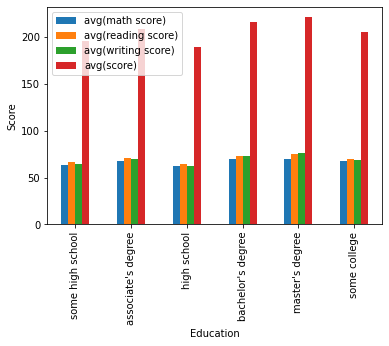

In [50]:
Students_education = Students.select(['gender', 'education', 'math score', 'reading score', 'writing score','score'])\
                     .groupBy('education')\
                     .mean()\
                     .toPandas()

Students_education.plot(kind = 'bar', x = 'education', y = Students_education.columns.tolist()[1:],
                        ylabel = 'Score', xlabel = 'Education')
plt.show()

## Запись/сохранение данных в файл

Метод write.save() используется для сохранения данных в различных форматах.
</br>
Метод write.select() используется для сохранения выбранных колонок.

In [51]:
Students.write.csv('Students.csv')
Students.select(['gender', 'education', 'math score', 'reading score', 'writing score','score'])\
               .write.csv('Students_select.csv')

# JSON data.write.save('dataset.json', format='json')
# JSON data.select(['data', 'open', 'close', 'adjusted']).write.save('dataset.json', format='json')